# Dogs Vs. Cats Model

The 2nd example from chapter 5.

In [1]:
import os
import re
import random

import pandas as pd

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Configuration

In [2]:
data_dir  = os.path.join("var", "data")
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "validation")
test_dir  = os.path.join(data_dir, "test")
model_dir = os.path.join("var", "model")

os.makedirs(model_dir, exist_ok=True)

## Load Data

In [3]:
batch_size =20

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

print("Classes: {}".format(train_generator.class_indices))

train_steps = len(train_generator.filenames) / batch_size
val_steps = len(validation_generator.filenames) / batch_size

print("Train Steps: {}  Validation Steps: {}".format(train_steps, val_steps))

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Classes: {'dog': 1, 'cat': 0}
Train Steps: 100.0  Validation Steps: 50.0


## Train Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [5]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=val_steps)

Epoch 1/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6894 - acc: 0.5320 - val_loss: 0.6756 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6601 - acc: 0.5940 - val_loss: 0.6480 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6142 - acc: 0.6575 - val_loss: 0.7121 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5852 - acc: 0.6765 - val_loss: 0.7328 - val_acc: 0.6370
Epoch 5/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5494 - acc: 0.7100 - val_loss: 0.7897 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5291 - acc: 0.7380 - val_loss: 0.6252 - val_acc: 0.7180
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5080 - acc: 0.7500 - val_loss: 0.5712 - val_acc: 0.7240
Epoch 8/30
100/100 [==============================] - 6s 63ms/step - 

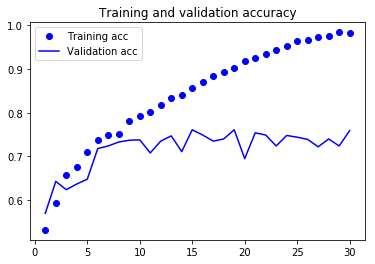

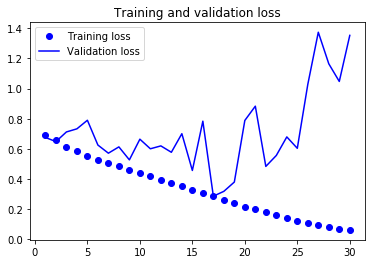

In [6]:
def plot_training_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
plot_training_history(history)

In [7]:
model.save('{}/cats_and_dogs_small_1.h5'.format(model_dir))

## Setup Image Transformations

In [8]:
train_cats_dir = os.path.join(train_dir, 'cat')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

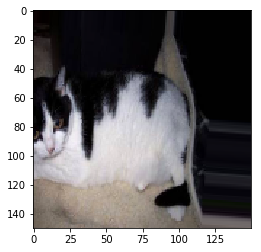

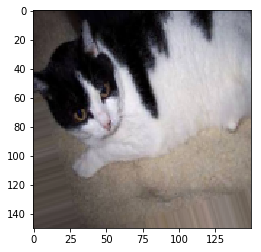

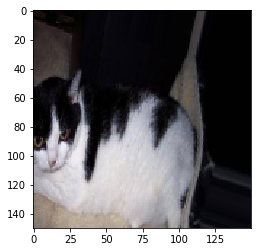

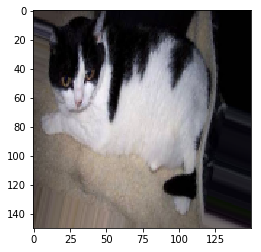

In [9]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = random.choice(fnames)
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

## Training With Image Augmentation

Adds a dropout layer too.

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    #optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=val_steps)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6922 - acc: 0.5085 - val_loss: 0.6920 - val_acc: 0.5032
Epoch 2/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6837 - acc: 0.5537 - val_loss: 0.6559 - val_acc: 0.6372
Epoch 3/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6670 - acc: 0.5958 - val_loss: 0.6854 - val_acc: 0.6275
Epoch 4/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6485 - acc: 0.6215 - val_loss: 0.6944 - val_acc: 0.6450
Epoch 5/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6373 - acc: 0.6438 - val_loss: 0.7547 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6235 - acc: 0.6389 - val_loss: 0.5214 - val_acc: 0.6398
Epoch 7/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6022 - acc: 0.6658 -

In [ ]:
plot_training_history(history)

In [ ]:
model.save('{}/cats_and_dogs_small_2.h5'.format(model_dir))